## Final Project: Hubble Deep Field

#### Import packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import sep

with fits.open('your_fits_file.fits', memmap=True) as hdul:
    data = hdul[0].data  # Access the data as needed

#### Load image using astropy.io.fits

In [16]:
image_data_f105w= fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

#### Plot the image using matplotlib

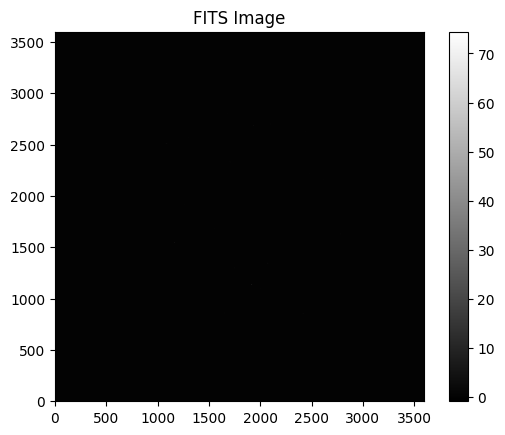

In [17]:
plt.imshow(image_data_f105w, cmap='gray', origin='lower', interpolation='nearest')
plt.colorbar()
plt.title("FITS Image")
plt.show()

#### SEP library to extract sources from the image

In [18]:
# Fix byte order 
image_data_f105w = image_data_f105w.byteswap().newbyteorder()

objects_f105w = sep.extract(image_data_f105w, thresh=3.0)  # Set threshold to 3 sigma
print(f"Number of sources detected: {len(objects_f105w)}")

Number of sources detected: 5


#### Plot the positions of the detected sources on top of the image

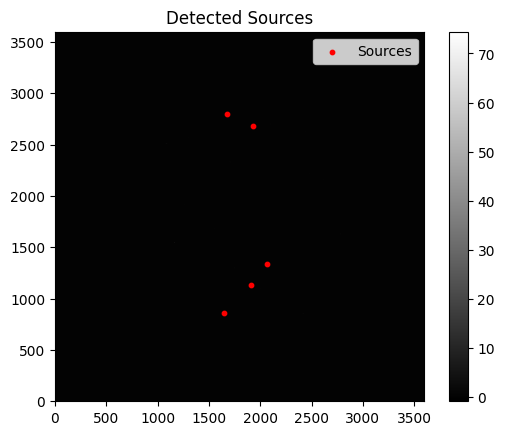

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot the detected sources
plt.imshow(image_data_f105w, cmap='gray', origin='lower', interpolation='nearest')
plt.colorbar()

# Plot the extracted sources
plt.scatter(objects['x'], objects['y'], color='red', s=10, label="Sources")
plt.legend()
plt.title("Detected Sources")
plt.show()

# Save the figure as png
plt.savefig('sources_detected.png', dpi=300)

# Histogram Fluxes of Sources

#### Compute Mean, Median, Standard Deviation

In [21]:
mean_flux = np.mean(fluxes_f105w)
median_flux = np.median(fluxes_f105w)
std_flux = np.std(fluxes_f105w)

print(f"Mean flux: {mean_flux}")
print(f"Median flux: {median_flux}")
print(f"Standard deviation of flux: {std_flux}")

Mean flux: 258.10129470825194
Median flux: 47.173912048339844
Standard deviation of flux: 364.61468686397126


#### Identify the Largest Outlier

To find the largest outlier, we will look for sources with fluxes that are significantly larger than the mean

In [22]:
# Find the largest outlier
outlier_idx = np.argmax(fluxes_f105w)
outlier_flux = fluxes_f105w[outlier_idx]

# Calculate how many standard deviations the outlier is from the mean
outlier_std_dev = (outlier_flux - mean_flux) / std_flux

print(f"Largest outlier flux: {outlier_flux}")
print(f"Outlier is {outlier_std_dev} standard deviations away from the mean.")

Largest outlier flux: 973.994140625
Outlier is 1.9634229549942128 standard deviations away from the mean.


#### Locate the Outlier on the Image

In [24]:
outlier_x = objects_f105w[outlier_idx]['x']
outlier_y = objects_f105w[outlier_idx]['y']

print(f"The largest outlier is located at coordinates: ({outlier_x}, {outlier_y})")

The largest outlier is located at coordinates: (1914.19122042895, 1134.46135391443)


# Create a 3-Color False Image (RGB)

#### Load the Images

In [ ]:
image_data_f125w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
image_data_f160w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')

#### Create the RGB Image

In [ ]:
rgb_image = np.dstack((image_data_f160w, image_data_f125w, image_data_f105w))

# Plot the RGB image
plt.imshow(rgb_image)
plt.title("3-Color False Image of the HUDF")
plt.show()

# Save the RGB image as PNG
plt.imsave('3color_UDF.png', rgb_image)